In [169]:
import pandas as pd
import numpy as np
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/MachineLearning_Platzi')

In [170]:
x = pd.read_csv('df_intermediate.csv')
y = x['worldwide_gross']
x.drop(['worldwide_gross','opening_gross','usa_gross','gross'], axis=1,inplace=True)
x.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,237000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9
1,300000000.0,2007.0,2.35,169.0,48350.0,300000000.0,7.1
2,245000000.0,2015.0,2.35,148.0,11700.0,245000000.0,6.8
3,250000000.0,2012.0,2.35,164.0,106759.0,250000000.0,8.5
4,250000000.0,2012.0,2.35,132.0,1873.0,263700000.0,6.6


In [171]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2404, 7), (1604, 7), (2404,), (1604,))

In [172]:
from sklearn.linear_model import Lasso
model = Lasso()

In [173]:
model.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [174]:
predicted = model.predict(x_test)
predicted

array([-5.78669170e+07,  1.78171227e+07,  6.11920178e+08, ...,
        1.22260076e+08,  2.60884526e+07,  1.65431141e+08])

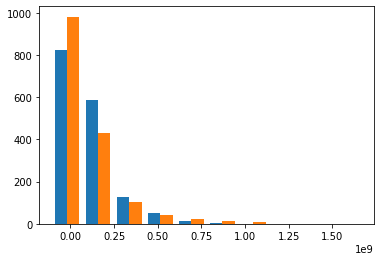

In [175]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist((predicted,y_test));

In [176]:
model.score(x_test, y_test)

0.5146038891367387

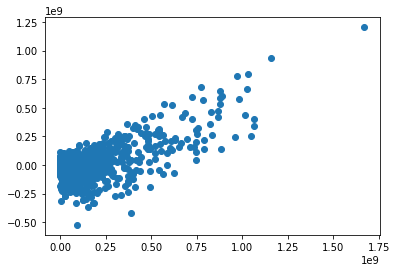

In [177]:
### esos son los errores absolutos
### el grafico debe presentar grupos de puntos cercano a 0
### porque se encuentra bien relativamente, sin embargo hay algunos puntos alejados del 0
residuals = y_test - predicted
plt.scatter(y_test,residuals)

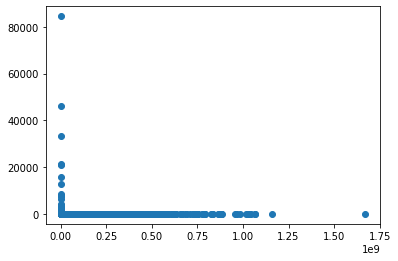

In [178]:
### esos son los errores porcentuales
### para peliculas de menor alcance se tiene valores residuales porcentuales muy altos
### este grafico no permite visualizar de forma detallada los errores porcentuales residuales, por lo que se aplicara logaritmo a los residuales
np_residuals = np.abs(residuals)/y_test
plt.scatter(y_test, np_residuals);

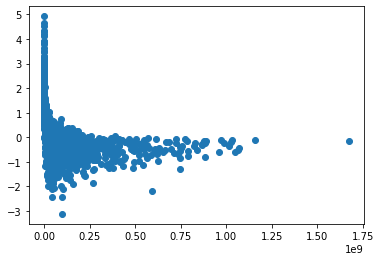

In [179]:
lnp_residuals = np.log10(np_residuals)
plt.scatter(y_test, lnp_residuals);

In [180]:
display(pd.Series(np_residuals).describe(),
        pd.Series(lnp_residuals).describe()  
      )

count     1604.000000
mean       194.067710
std       2731.465950
min          0.000756
25%          0.360599
50%          0.991468
75%          3.826441
max      84538.971006
Name: worldwide_gross, dtype: float64

count    1604.000000
mean        0.146188
std         0.940555
min        -3.121754
25%        -0.442975
50%        -0.003722
75%         0.582794
max         4.927057
Name: worldwide_gross, dtype: float64

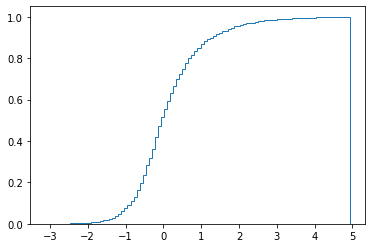

In [181]:
plt.hist(lnp_residuals, bins=100, density=True, histtype='step', cumulative=True);

array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

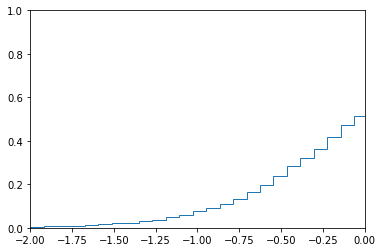

In [182]:
plt.hist(lnp_residuals, bins=100, density=True, histtype='step', cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5), np.linspace(-2,0,5))
### se obtiene un error del 1% para el casi 2 porciento de los datos
### se obtiene un error del 10% para el casi 10% de datos y 
### se obtiene un error del 100% para casi el 50% de datos
### hay mucho margen para mejorar

In [ ]:
### crear feature informativas, que esta ligada al problema de predicción
### feature que sean independientes. Esto debido a que tener mas dimensiones se necesitan mas datos para el entrenamiento. Maldicion de dimensionalidad
### no utilizar demasiadas features